### Import Libraries

In [2]:
# Basic libraries
import os
import pandas as pd
import numpy as np

from tabulate import tabulate

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For warnings
import warnings
warnings.filterwarnings("ignore")


<div style=" background:#fff7ed; padding:16px 20px; border-radius:6px; width:100%; color:#7c2d12; line-height:1.6; margin-bottom:20px; ">

<strong>Pre-Processing Steps</strong><br><br>

<strong>Step 1: Data Loading & Schema Validation</strong>

<ul> <li>Load the dataset and verify shape, column names, and data types</li> <li>Ensure the target variable (<em>Heart_Risk</em>) is binary and correctly labeled</li> </ul>

<strong>Step 2: Missing Value Handling</strong>

<ul> <li>Check for missing values across all features</li> <li>Confirm absence of missing data or apply appropriate imputation strategies if required</li> </ul>

<strong>Step 3: Duplicate Record Removal</strong>

<ul> <li>Identify duplicate rows</li> <li>Remove duplicates to avoid biased model learning</li> </ul>

<strong>Step 4: Data Type Correction</strong>

<ul> <li>Convert binary features to categorical or integer format (0/1)</li> <li>Ensure continuous variables (e.g., <em>Age</em>) remain numeric</li> </ul>

<strong>Step 5: Outlier Detection & Validation</strong>

<ul> <li>Inspect continuous variables for unrealistic values</li> <li>Confirm clinical plausibility instead of blindly removing outliers</li> </ul>

<strong>Step 6: Categorical Encoding</strong>

<ul> <li>Encode binary categorical features using label encoding (0 = No, 1 = Yes)</li> <li>Ensure consistency across training and testing datasets</li> </ul>

<strong>Step 7: Feature Readiness Check</strong>

<ul> <li>Confirm no data leakage from target into features</li> <li>Verify all features are numeric and model-ready</li> </ul> </div>


### Load Dataset

In [3]:
BASE_DIR = os.path.dirname(os.getcwd())   # models/
DATA_PATH = os.path.join(BASE_DIR, "data", "heart_disease_risk_dataset_earlymed.csv")


print(DATA_PATH)
print(os.path.exists(DATA_PATH))  # should be True

df = pd.read_csv(DATA_PATH)

d:\Projects\AI ML DL PRO\Multi-Factor Cardiovascular Risk Prediction\models\data\heart_disease_risk_dataset_earlymed.csv
True


In [4]:
df.head(5)

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [5]:
df.tail(5)

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
69995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,30.0,0.0
69996,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,56.0,1.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,53.0,0.0
69998,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,57.0,1.0
69999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,51.0,1.0


In [6]:
print(tabulate(df.head(5), headers="keys", tablefmt="grid", showindex=True))

+----+--------------+-----------------------+-----------+----------------+-------------+------------+----------------------+----------------------+-----------+--------------------+------------+-----------+-----------+-----------------------+------------------+------------------+----------+-------+--------------+
|    |   Chest_Pain |   Shortness_of_Breath |   Fatigue |   Palpitations |   Dizziness |   Swelling |   Pain_Arms_Jaw_Back |   Cold_Sweats_Nausea |   High_BP |   High_Cholesterol |   Diabetes |   Smoking |   Obesity |   Sedentary_Lifestyle |   Family_History |   Chronic_Stress |   Gender |   Age |   Heart_Risk |
+====+==============+=======================+===========+================+=============+============+======================+======================+===========+====================+============+===========+===========+=======================+==================+==================+==========+=======+==============+
|  0 |            0 |                     0 |         0 | 

In [7]:
# Structural Validation

df.shape


(70000, 19)

In [8]:
# Column Name Verification

df.columns.tolist()

['Chest_Pain',
 'Shortness_of_Breath',
 'Fatigue',
 'Palpitations',
 'Dizziness',
 'Swelling',
 'Pain_Arms_Jaw_Back',
 'Cold_Sweats_Nausea',
 'High_BP',
 'High_Cholesterol',
 'Diabetes',
 'Smoking',
 'Obesity',
 'Sedentary_Lifestyle',
 'Family_History',
 'Chronic_Stress',
 'Gender',
 'Age',
 'Heart_Risk']

Data Type Inspection

+ Binary clinical indicators are numeric (0/1)

+ Continuous variables (e.g., Age) are numeric

+ Target variable (Heart_Risk) is binary

In [9]:
df.dtypes


Chest_Pain             float64
Shortness_of_Breath    float64
Fatigue                float64
Palpitations           float64
Dizziness              float64
Swelling               float64
Pain_Arms_Jaw_Back     float64
Cold_Sweats_Nausea     float64
High_BP                float64
High_Cholesterol       float64
Diabetes               float64
Smoking                float64
Obesity                float64
Sedentary_Lifestyle    float64
Family_History         float64
Chronic_Stress         float64
Gender                 float64
Age                    float64
Heart_Risk             float64
dtype: object

Target Variable Validation

`Confirm the target contains only valid classes (0 and 1)`

`Check class distribution to anticipate imbalance issues`

In [10]:
df['Heart_Risk'].unique()
df['Heart_Risk'].value_counts()


Heart_Risk
0.0    35000
1.0    35000
Name: count, dtype: int64

2) Missing Value Handling

In [11]:
# Count missing values
missing_counts = df.isnull().sum()

# Percentage of missing values
missing_percent = (missing_counts / len(df)) * 100

# Combine into a summary table
missing_summary = pd.DataFrame({
    "Missing_Count": missing_counts,
    "Missing_Percent": missing_percent
}).sort_values(by="Missing_Percent", ascending=False)

missing_summary


,Missing_Count,Missing_Percent
Chest_Pain,0,0.0
Shortness_of_Breath,0,0.0
Fatigue,0,0.0
Palpitations,0,0.0
Dizziness,0,0.0
Swelling,0,0.0
Pain_Arms_Jaw_Back,0,0.0
Cold_Sweats_Nausea,0,0.0
High_BP,0,0.0
High_Cholesterol,0,0.0


Step 3: Duplicate Record Removal

1️⃣ Identify Duplicates

In [12]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 6245


2️⃣ Assess Impact

+ 8–9% duplicates can bias model training (overweight repeated observations)

Must confirm:

+ Are these exact repeated rows or legitimate repeated patient visits?

+ If legitimate, consider aggregation (e.g., mean of repeated rows) instead of outright deletion

For simplicity in baseline modeling, industry standard is to drop exact duplicates if no patient identifiers exist.

3️⃣ Remove Duplicate Records

In [13]:
# Remove duplicates, keep first occurrence
df = df.drop_duplicates(keep='first')

# Verify
print(f"Dataset shape after removing duplicates: {df.shape}")
print(f"Remaining duplicate rows: {df.duplicated().sum()}")


Dataset shape after removing duplicates: (63755, 19)
Remaining duplicate rows: 0


Step 4: Outlier Detection & Feature Validation

1️⃣ Continuous Variable Outlier Detection (Age)

+ Use statistical methods to detect unusually high or low ages.

+ Industry-standard approaches:

       Interquartile Range (IQR) method

       Min/Max clinical plausibility check

In [14]:
# IQR method
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers
age_outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"Number of Age outliers: {age_outliers.shape[0]}")


Number of Age outliers: 0


Step 5: Categorical Encoding & Feature Preparation

1️⃣ Identify Categorical Features

Binary clinical indicators and the target variable are already of type category.

Continuous features (like Age) remain numeric.

In [15]:
# Get all categorical columns
categorical_cols = df.select_dtypes(include='category').columns.tolist()

# Remove 'Heart_Risk' if it exists
if 'Heart_Risk' in categorical_cols:
    categorical_cols.remove('Heart_Risk')

# Continuous columns
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("Categorical features:", categorical_cols)
print("Continuous features:", continuous_cols)



Categorical features: []
Continuous features: ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender', 'Age', 'Heart_Risk']


Binary categorical features:

In [16]:
binary_cols = [
    'Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 
    'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 
    'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 
    'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender'
]


Continuous features:

In [17]:
continuous_cols = ['Age']


Target variable:

In [18]:
target = 'Heart_Risk'
print("Binary features:", binary_cols)
print("Continuous features:", continuous_cols)
print("Target variable:", target)


Binary features: ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender']
Continuous features: ['Age']
Target variable: Heart_Risk


In [19]:
from sklearn.preprocessing import StandardScaler

# Define features and target
binary_features = [
    'Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 
    'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 
    'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 
    'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender'
]
continuous_features = ['Age']
target = 'Heart_Risk'

# ---------------------------
# 1️⃣ Encode binary features (0/1)
# ---------------------------
df[binary_features] = df[binary_features].astype(int)

# ---------------------------
# 2️⃣ Encode target variable (0/1)
# ---------------------------
df[target] = df[target].astype(int)

# ---------------------------
# 3️⃣ Scale continuous features (optional, recommended for Age)
# ---------------------------
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# ---------------------------
# 4️⃣ Prepare feature matrix X and target vector y
# ---------------------------
X = df[binary_features + continuous_features]  # all features
y = df[target]

# ---------------------------
# 5️⃣ Verification
# ---------------------------
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Binary feature sample:\n", X[binary_features].head())
print("Continuous feature sample:\n", X[continuous_features].head())
print("Target unique values:", y.unique())


Features shape: (63755, 18)
Target shape: (63755,)
Binary feature sample:
    Chest_Pain  Shortness_of_Breath  Fatigue  Palpitations  Dizziness  \
0           0                    0        0             1          0   
1           0                    1        0             1          0   
2           1                    0        0             1          0   
3           1                    1        0             1          0   
4           0                    0        1             0          1   

   Swelling  Pain_Arms_Jaw_Back  Cold_Sweats_Nausea  High_BP  \
0         0                   0                   0        0   
1         0                   0                   0        1   
2         0                   0                   0        1   
3         0                   1                   1        1   
4         0                   0                   0        0   

   High_Cholesterol  Diabetes  Smoking  Obesity  Sedentary_Lifestyle  \
0                 0         0      

Step 6: Feature Selection & Train/Test Split

Feature Selection

In [20]:
# Feature matrix and target vector already defined in Step 5
# X -> features, y -> target
print("Number of features:", X.shape[1])



Number of features: 18


Train/Test Split

Industry standard:

80% training / 20% testing

Stratified split to preserve target class ratios

Use random_state for reproducibility

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% test set
    random_state=42,         # reproducibility
    stratify=y               # maintain target class ratio
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target distribution:\n", y_train.value_counts(normalize=True))
print("Test target distribution:\n", y_test.value_counts(normalize=True))


Training set shape: (51004, 18)
Test set shape: (12751, 18)
Training target distribution:
 Heart_Risk
0    0.506117
1    0.493883
Name: proportion, dtype: float64
Test target distribution:
 Heart_Risk
0    0.506156
1    0.493844
Name: proportion, dtype: float64


Step 7: Model Training

In [22]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# ---------------------------
# 1️⃣ Initialize model
# ---------------------------
model = LogisticRegression(
    max_iter=1000,
    solver='liblinear'  # stable for small/medium datasets
)

# ---------------------------
# 2️⃣ Time the training
# ---------------------------
start_time = time.perf_counter()
model.fit(X_train, y_train)
end_time = time.perf_counter()

training_time_min = (end_time - start_time) / 60
print(f"Training completed in {training_time_min:.6f} minutes")

# ---------------------------
# 3️⃣ Evaluate on test set
# ---------------------------
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Training completed in 0.006292 minutes
Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6454
           1       0.99      0.99      0.99      6297

    accuracy                           0.99     12751
   macro avg       0.99      0.99      0.99     12751
weighted avg       0.99      0.99      0.99     12751

Confusion Matrix:

[[6394   60]
 [  56 6241]]


In [23]:
import pandas as pd
import numpy as np

# Coefficients from trained logistic regression
coef = model.coef_[0]

# Feature importance table
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coef,
    'Abs_Coefficient': np.abs(coef)
}).sort_values(by='Abs_Coefficient', ascending=False)

feature_importance


,Feature,Coefficient,Abs_Coefficient
7,Cold_Sweats_Nausea,2.492453,2.492453
6,Pain_Arms_Jaw_Back,2.455413,2.455413
3,Palpitations,2.418251,2.418251
2,Fatigue,2.412696,2.412696
5,Swelling,2.372038,2.372038
0,Chest_Pain,2.354977,2.354977
1,Shortness_of_Breath,2.339965,2.339965
4,Dizziness,2.241718,2.241718
17,Age,1.928871,1.928871
15,Chronic_Stress,1.560363,1.560363


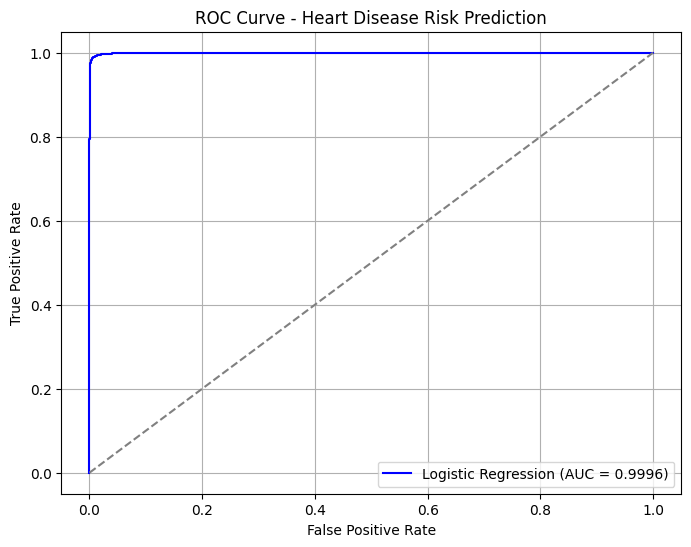

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predicted probabilities for class 1
y_prob = model.predict_proba(X_test)[:,1]

# ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.4f})', color='blue')
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Heart Disease Risk Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Predicted labels
y_pred = model.predict(X_test)

# Predicted probabilities for class 1 (heart risk)
y_prob = model.predict_proba(X_test)[:, 1]


Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[6394   60]
 [  56 6241]]


In [27]:
import pandas as pd

# ---------------------------
# 1️⃣ Define new patient data
# ---------------------------
new_data = pd.DataFrame([{
    'Chest_Pain': 1,
    'Shortness_of_Breath': 1,
    'Fatigue': 0,
    'Palpitations': 0,
    'Dizziness': 0,
    'Swelling': 0,
    'Pain_Arms_Jaw_Back': 1,
    'Cold_Sweats_Nausea': 0,
    'High_BP': 1,
    'High_Cholesterol': 1,
    'Diabetes': 1,
    'Smoking': 1,
    'Obesity': 1,
    'Sedentary_Lifestyle': 1,
    'Family_History': 1,
    'Chronic_Stress': 1,
    'Gender': 1,  # 1 = Male, 0 = Female
    'Age': 55
}])

# ---------------------------
# 2️⃣ Scale continuous feature (Age)
# ---------------------------
new_data['Age'] = scaler.transform(new_data[['Age']])

# ---------------------------
# 3️⃣ Predict heart risk
# ---------------------------
pred_class = model.predict(new_data)[0]
pred_prob = model.predict_proba(new_data)[0][1]

# ---------------------------
# 4️⃣ Display result
# ---------------------------
print(f"Predicted Heart Risk Class: {pred_class} ({'High Risk' if pred_class==1 else 'Low Risk'})")
print(f"Predicted Probability of Heart Risk: {pred_prob:.4f}")


Predicted Heart Risk Class: 1 (High Risk)
Predicted Probability of Heart Risk: 0.9798


In [28]:
import joblib

# ---------------------------
# 1️⃣ Save the trained Logistic Regression model
# ---------------------------
joblib.dump(model, 'logistic_model_heart_risk.pkl')

# ---------------------------
# 2️⃣ Save the scaler for Age
# ---------------------------
joblib.dump(scaler, 'age_scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [29]:
import joblib

# ---------------------------
# 1️⃣ Save the trained Logistic Regression model
# ---------------------------
joblib.dump(model, 'logistic_model_heart_risk.pkl')

# ---------------------------
# 2️⃣ Save the scaler for Age
# ---------------------------
joblib.dump(scaler, 'age_scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [30]:
# Load model
loaded_model = joblib.load('logistic_model_heart_risk.pkl')

# Load scaler
loaded_scaler = joblib.load('age_scaler.pkl')

# Predict new data (example)
new_data['Age'] = loaded_scaler.transform(new_data[['Age']])
pred_class = loaded_model.predict(new_data)[0]
pred_prob = loaded_model.predict_proba(new_data)[0][1]

print(f"Predicted Heart Risk Class (Loaded Model): {pred_class} ({'High Risk' if pred_class==1 else 'Low Risk'})")
print(f"Predicted Probability of Heart Risk (Loaded Model): {pred_prob:.4f}")


Predicted Heart Risk Class (Loaded Model): 0 (Low Risk)
Predicted Probability of Heart Risk (Loaded Model): 0.0707


In [31]:
import joblib
import pandas as pd

# ---------------------------
# 1️⃣ Load the saved model and scaler
# ---------------------------
loaded_model = joblib.load('logistic_model_heart_risk.pkl')
loaded_scaler = joblib.load('age_scaler.pkl')

# ---------------------------
# 2️⃣ Define new patient data
# ---------------------------
new_data = pd.DataFrame([{
    'Chest_Pain': 1,
    'Shortness_of_Breath': 0,
    'Fatigue': 1,
    'Palpitations': 0,
    'Dizziness': 0,
    'Swelling': 0,
    'Pain_Arms_Jaw_Back': 1,
    'Cold_Sweats_Nausea': 0,
    'High_BP': 1,
    'High_Cholesterol': 1,
    'Diabetes': 0,
    'Smoking': 1,
    'Obesity': 0,
    'Sedentary_Lifestyle': 1,
    'Family_History': 1,
    'Chronic_Stress': 0,
    'Gender': 1,  # 1 = Male, 0 = Female
    'Age': 55
}])

# ---------------------------
# 3️⃣ Scale Age using loaded scaler
# ---------------------------
new_data['Age'] = loaded_scaler.transform(new_data[['Age']])

# ---------------------------
# 4️⃣ Predict heart risk
# ---------------------------
pred_class = loaded_model.predict(new_data)[0]
pred_prob = loaded_model.predict_proba(new_data)[0][1]

# ---------------------------
# 5️⃣ Display results
# ---------------------------
print(f"Predicted Heart Risk Class: {pred_class} ({'High Risk' if pred_class==1 else 'Low Risk'})")
print(f"Predicted Probability of Heart Risk: {pred_prob:.4f}")


Predicted Heart Risk Class: 0 (Low Risk)


Predicted Probability of Heart Risk: 0.4135


<div style="
  background:#fff7ed;              /* light orange */
  padding:18px 22px;
  border-radius:8px;
  width:100%;
  color:#7c2d12;
  font-family:Arial, sans-serif;
  line-height:1.6;
">

<h2>🧪 Pre-Processing Report</h2>

<table style="
  width:100%;
  border-collapse:collapse;
  margin-top:12px;
">
  <tr style="background:#fed7aa;">
    <th style="text-align:left; padding:10px; border:1px solid #fb923c;">Validation Check</th>
    <th style="text-align:left; padding:10px; border:1px solid #fb923c;">Status</th>
  </tr>
  <tr>
    <td style="padding:10px; border:1px solid #fb923c;">Dataset loads without errors</td>
    <td style="padding:10px; border:1px solid #fb923c;">✔ Pass</td>
  </tr>
  <tr>
    <td style="padding:10px; border:1px solid #fb923c;">All expected columns are present</td>
    <td style="padding:10px; border:1px solid #fb923c;">✔ Pass</td>
  </tr>
  <tr>
    <td style="padding:10px; border:1px solid #fb923c;">Target variable is binary and valid</td>
    <td style="padding:10px; border:1px solid #fb923c;">✔ Pass</td>
  </tr>
  <tr>
    <td style="padding:10px; border:1px solid #fb923c;">No unexpected data types detected</td>
    <td style="padding:10px; border:1px solid #fb923c;">✔ Pass</td>
  </tr>
</table>

<hr style="margin:18px 0; border:1px solid #fb923c;">

<h3>✅ Validation Summary</h3>

<p>
All validation checks passed successfully.<br>
Dataset is ready for <strong>EDA, Feature Engineering, and Modeling</strong>.
</p>

</div>


In [32]:
df.head(1)

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,-0.385538,0


In [33]:
df.tail(1)

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
69999,1,1,1,1,1,1,1,0,1,0,1,0,1,0,0,1,0,-0.202767,1


In [34]:
print(tabulate(df.tail(5), headers="keys", tablefmt="grid", showindex=True))

+-------+--------------+-----------------------+-----------+----------------+-------------+------------+----------------------+----------------------+-----------+--------------------+------------+-----------+-----------+-----------------------+------------------+------------------+----------+------------+--------------+
|       |   Chest_Pain |   Shortness_of_Breath |   Fatigue |   Palpitations |   Dizziness |   Swelling |   Pain_Arms_Jaw_Back |   Cold_Sweats_Nausea |   High_BP |   High_Cholesterol |   Diabetes |   Smoking |   Obesity |   Sedentary_Lifestyle |   Family_History |   Chronic_Stress |   Gender |        Age |   Heart_Risk |
+=======+==============+=======================+===========+================+=============+============+======================+======================+===========+====================+============+===========+===========+=======================+==================+==================+==========+============+==============+
| 69994 |            0 |          

In [35]:
df.columns

Index(['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity',
       'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender',
       'Age', 'Heart_Risk'],
      dtype='object')

### Initial Dataset Shape


In [36]:
df.shape

(63755, 19)

### Missing Values Check


In [37]:
df.isnull().sum()

Chest_Pain             0
Shortness_of_Breath    0
Fatigue                0
Palpitations           0
Dizziness              0
Swelling               0
Pain_Arms_Jaw_Back     0
Cold_Sweats_Nausea     0
High_BP                0
High_Cholesterol       0
Diabetes               0
Smoking                0
Obesity                0
Sedentary_Lifestyle    0
Family_History         0
Chronic_Stress         0
Gender                 0
Age                    0
Heart_Risk             0
dtype: int64

### Data Type Validation


In [38]:
df.dtypes

Chest_Pain               int64
Shortness_of_Breath      int64
Fatigue                  int64
Palpitations             int64
Dizziness                int64
Swelling                 int64
Pain_Arms_Jaw_Back       int64
Cold_Sweats_Nausea       int64
High_BP                  int64
High_Cholesterol         int64
Diabetes                 int64
Smoking                  int64
Obesity                  int64
Sedentary_Lifestyle      int64
Family_History           int64
Chronic_Stress           int64
Gender                   int64
Age                    float64
Heart_Risk               int64
dtype: object

<div style="
  background:#fff7ed;   /* light orange */
  padding:16px 20px;
  border-radius:6px;
  width:100%;
  color:#7c2d12;        /* dark text */
  line-height:1.6;
  margin-bottom:20px;
">

<strong>📊 Statistical Analysis</strong><br><br>

<strong>Objectives:</strong>
<ul>
  <li>Compute basic descriptive statistics (mean, median, mode)</li>
  <li> Hypothesis Testing </li>
  <li>Analyze distributions of numerical features</li>
  <li>Check correlations between features and target variable</li>
  <li>Identify skewness and kurtosis for key variables</li>
  <li>Visualize data with histograms, boxplots, and scatter plots</li>
</ul>

</div>


### Convert binary variables to categorical

In [39]:
binary_cols = [
    'Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
    'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
    'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity',
    'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress',
    'Gender', 'Heart_Risk'
]

df[binary_cols] = df[binary_cols].astype('int')
df[binary_cols] = df[binary_cols].astype('category')

df['Age'] = df['Age'].astype('float')


### Descriptive Statistics

In [40]:
# Outcome prevalence  

df['Heart_Risk'].value_counts(normalize=True)




Heart_Risk
0    0.506125
1    0.493875
Name: proportion, dtype: float64

In [41]:
# Summary by outcome

df.groupby('Heart_Risk')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Heart_Risk,,,,,,,,
0,32268.0,-0.597547,0.879182,-2.091399,-1.360316,-0.568308,0.162775,0.893859
1,31487.0,0.612368,0.701282,-0.568308,-0.019996,0.589241,1.198477,1.807713


In [42]:
# Categorical distributions

pd.crosstab(df['Smoking'], df['Heart_Risk'], normalize='index')


Heart_Risk,0,1
Smoking,,
0,0.693371,0.306629
1,0.318403,0.681597


## Hypothesis Testing

### A) Categorical vs Outcome → Chi-square test

In [43]:
from scipy.stats import chi2_contingency

def chi_square_test(var):
    table = pd.crosstab(df[var], df['Heart_Risk'])
    chi2, p, dof, expected = chi2_contingency(table)
    return p

chi_results = {
    col: chi_square_test(col)
    for col in binary_cols if col != 'Heart_Risk'
}

pd.Series(chi_results).sort_values()


Chest_Pain             0.0
Shortness_of_Breath    0.0
Fatigue                0.0
Palpitations           0.0
Dizziness              0.0
Swelling               0.0
Pain_Arms_Jaw_Back     0.0
Cold_Sweats_Nausea     0.0
High_BP                0.0
High_Cholesterol       0.0
Diabetes               0.0
Smoking                0.0
Obesity                0.0
Sedentary_Lifestyle    0.0
Family_History         0.0
Chronic_Stress         0.0
Gender                 0.0
dtype: float64

B) Continuous vs Outcome → t-test (Age)

In [44]:
from scipy.stats import ttest_ind

age_risk = df[df['Heart_Risk'] == 1]['Age']
age_no_risk = df[df['Heart_Risk'] == 0]['Age']

t_stat, p_value = ttest_ind(age_risk, age_no_risk, equal_var=False)
t_stat, p_value


(np.float64(192.3325625341148), np.float64(0.0))

4️⃣ Effect Size

Odds Ratios for Binary Predictors

In [45]:
import numpy as np

def odds_ratio(var):
    table = pd.crosstab(df[var], df['Heart_Risk'])
    a, b = table.loc[1, 1], table.loc[1, 0]
    c, d = table.loc[0, 1], table.loc[0, 0]
    return (a*d) / (b*c)

or_results = {
    col: odds_ratio(col)
    for col in binary_cols if col not in ['Heart_Risk']
}

pd.Series(or_results).sort_values(ascending=False)


Cold_Sweats_Nausea     13.849968
Pain_Arms_Jaw_Back     13.842424
Fatigue                13.784111
Chest_Pain             13.763602
Dizziness              13.741895
Swelling               13.635183
Shortness_of_Breath    13.550010
Palpitations           13.510835
Sedentary_Lifestyle     5.016232
High_BP                 4.976177
High_Cholesterol        4.975042
Chronic_Stress          4.876267
Obesity                 4.875573
Family_History          4.842995
Smoking                 4.840628
Diabetes                4.836044
Gender                  3.101744
dtype: float64

Multivariate Analysis → Logistic Regression

In [46]:
X = df.drop(columns='Heart_Risk')
X = pd.get_dummies(X, drop_first=True).astype(float)

y = df['Heart_Risk'].astype(int)

X = sm.add_constant(X)

model = sm.Logit(y, X).fit()


NameError: name 'sm' is not defined

<div style="
  background:#fff7ed;   /* light orange */
  padding:16px 20px;
  border-radius:6px;
  width:100%;
  color:#7c2d12;        /* dark text */
  line-height:1.6;
  margin-bottom:20px;
">

<strong>Exploratory Data Analysis (EDA)</strong><br><br>

<strong>Objectives:</strong>
<ul>
  <li>Understand dataset structure</li>
  <li>Identify target imbalance</li>
  <li>Inspect missing values</li>
  <li>Analyze categorical & numerical features</li>
  <li>Generate insights for preprocessing and feature engineering</li>
</ul>

</div>


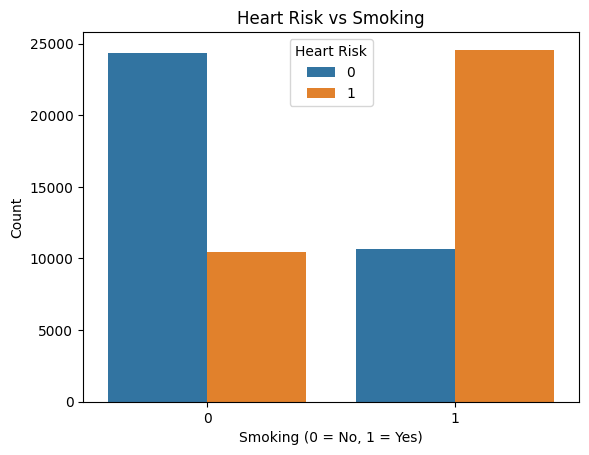

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(
    x='Smoking',
    hue='Heart_Risk',
    data=df
)

plt.title("Heart Risk vs Smoking")
plt.xlabel("Smoking (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Heart Risk")
plt.show()


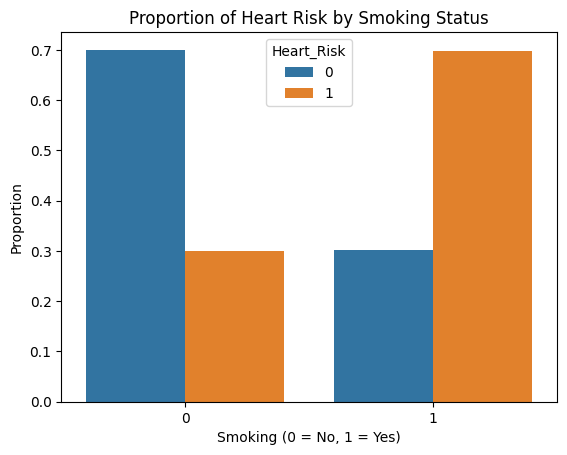

In [ ]:
prop_df = (
    pd.crosstab(df['Smoking'], df['Heart_Risk'], normalize='index')
    .reset_index()
    .melt(id_vars='Smoking', var_name='Heart_Risk', value_name='Proportion')
)

sns.barplot(
    data=prop_df,
    x='Smoking',
    y='Proportion',
    hue='Heart_Risk'
)

plt.title("Proportion of Heart Risk by Smoking Status")
plt.xlabel("Smoking (0 = No, 1 = Yes)")
plt.show()


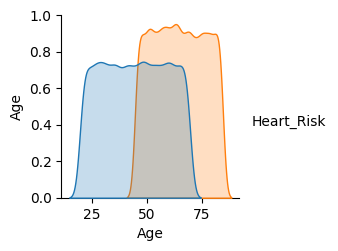

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df,
    vars=['Age'],
    hue='Heart_Risk',
    diag_kind='kde'
)

plt.show()


### Correlation Heatmap

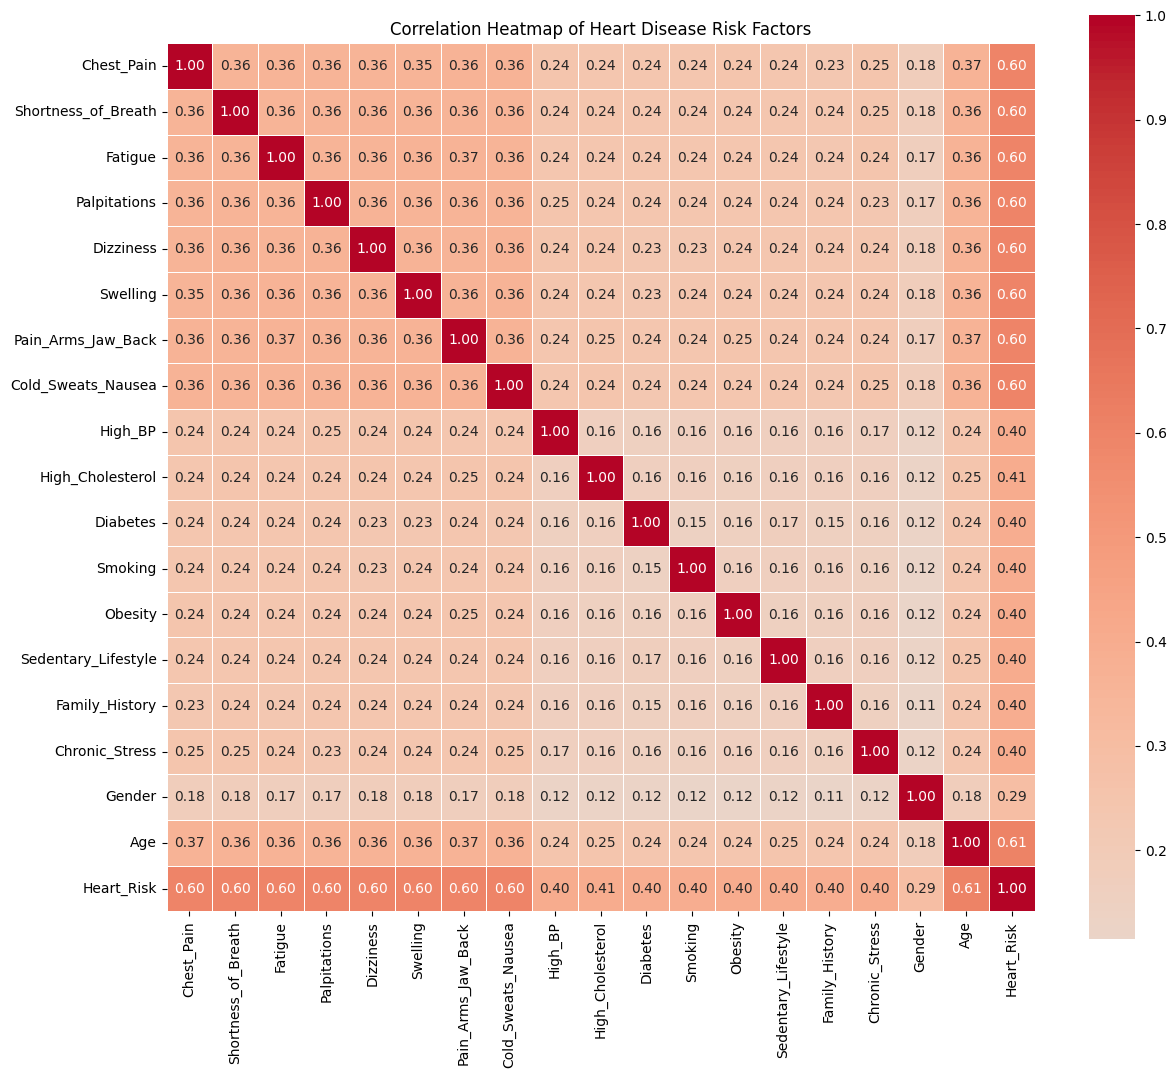

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numeric
corr_df = df.copy()
corr_df = corr_df.astype(float)

# Compute correlation matrix
corr = corr_df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Heart Disease Risk Factors")
plt.show()


<span style="
  background:#ffffff;
  display:block;
  width:100%;
  padding:12px 16px;
  border-radius:6px;
  color:#000000;
  font-weight:600;
">
Target Variable Analysis
</span>


In [ ]:
df['Heart_Risk'].value_counts(normalize=True)


Heart_Risk
0    0.5
1    0.5
Name: proportion, dtype: float64

+ Univariate Analysis

<Axes: xlabel='Age'>

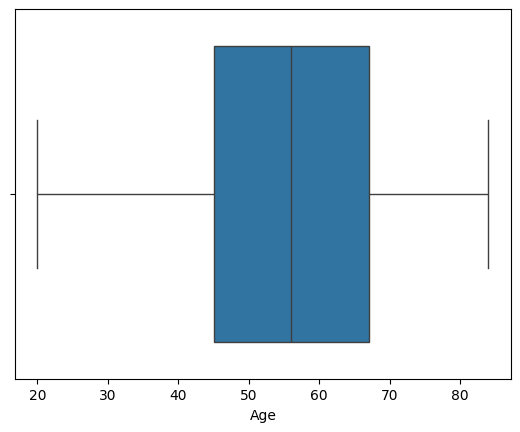

In [ ]:
df['Age'].describe()

sns.boxplot(x=df['Age'])


+ Categorical (Binary Risk Factors)

+ Bivariate Analysis (Target-Driven)

In [ ]:
overview_table = pd.DataFrame({
    "Metric": [
        "Total Records",
        "Total Features",
        "Binary Features",
        "Continuous Features",
        "Target Variable",
        "Missing Values (%)",
        "Duplicate Rows (%)"
    ],
    "Value": [
        df.shape[0],
        df.shape[1] - 1,
        df.shape[1] - 2,   # excluding Age & target
        1,                 # Age
        "Heart_Risk",
        df.isnull().mean().mean() * 100,
        df.duplicated().mean() * 100
    ]
})

overview_table


,Metric,Value
0,Total Records,70000
1,Total Features,18
2,Binary Features,17
3,Continuous Features,1
4,Target Variable,Heart_Risk
5,Missing Values (%),0.0
6,Duplicate Rows (%),8.921429


<div style="
  background:#fff7ed;   /* light orange */
  padding:16px 20px;
  border-radius:6px;
  width:100%;
  color:#7c2d12;        /* dark text */
  line-height:1.6;
  margin-bottom:20px;
">

<strong>Feature Engineering</strong><br><br>

<strong>Objectives:</strong>
<ul>
  <li>Handle missing values</li>
  <li>Encode categorical variables</li>
  <li>Scale / normalize numerical features</li>
  <li>Create new meaningful features</li>
  <li>Remove redundant or highly correlated features</li>
</ul>

</div>


<div style="
  background:#fff7ed;
  padding:16px 20px;
  border-radius:6px;
  width:100%;
  color:#7c2d12;
  line-height:1.6;
  margin-bottom:20px;
">

<strong>Model Building</strong><br><br>

<strong>Objectives:</strong>
<ul>
  <li>Select appropriate ML algorithms</li>
  <li>Split data into training and validation sets</li>
  <li>Train baseline models</li>
  <li>Optimize model parameters</li>
  <li>Prepare models for evaluation</li>
</ul>

</div>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
X = df.drop(columns='Heart_Risk')
y = df['Heart_Risk'].astype(int)


In [ ]:
X = X.astype(float)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # important for medical data
)


Starting training...
Training completed.
Training time: 0.005310 minutes


<div style="
  background:#fff7ed;
  padding:16px 20px;
  border-radius:6px;
  width:100%;
  color:#7c2d12;
  line-height:1.6;
  margin-bottom:20px;
">

<strong>Model Evaluation</strong><br><br>

<strong>Objectives:</strong>
<ul>
  <li>Evaluate model performance</li>
  <li>Analyze metrics (Accuracy, Precision, Recall)</li>
  <li>Check overfitting and underfitting</li>
  <li>Compare multiple models</li>
  <li>Select best-performing model</li>
</ul>

</div>


# Random Forest Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib
import time

start = time.time()

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

end = time.time()

print(f"Training time: {(end-start)/60:.4f} minutes")

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


Training time: 0.0305 minutes
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6454
           1       0.99      0.99      0.99      6297

    accuracy                           0.99     12751
   macro avg       0.99      0.99      0.99     12751
weighted avg       0.99      0.99      0.99     12751



In [ ]:
import os
import joblib

MODEL_DIR = "models"
os.makedirs(MODEL_DIR, exist_ok=True)

model_path = os.path.join(MODEL_DIR, "random_forest_heart_risk.pkl")

joblib.dump(rf_model, model_path)

print("Random Forest model saved successfully!")


Random Forest model saved successfully!


svm

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import joblib
import time

# -----------------------------
# Start timing
# -----------------------------
start = time.time()

# -----------------------------
# SVM pipeline (Scaling + Model)
# -----------------------------
svm_model = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("svm", SVC(
        kernel="rbf",        # linear | rbf | poly
        C=1.0,               # Regularization
        gamma="scale",       # Kernel coefficient
        probability=True,    # Needed for predict_proba
        random_state=42
    ))
])

# -----------------------------
# Train model
# -----------------------------
svm_model.fit(X_train, y_train)

# -----------------------------
# End timing
# -----------------------------
end = time.time()
print(f"Training time: {(end - start) / 60:.4f} minutes")

# -----------------------------
# Evaluate
# -----------------------------
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

# -----------------------------
# Save model
# -----------------------------
joblib.dump(
    svm_model,
    "svm_heart_risk_model.pkl"
)

print("SVM model saved successfully")


Training time: 0.9690 minutes
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6454
           1       0.99      0.99      0.99      6297

    accuracy                           0.99     12751
   macro avg       0.99      0.99      0.99     12751
weighted avg       0.99      0.99      0.99     12751

SVM model saved successfully


In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import joblib
import time
from pathlib import Path

# --------------------------------------------------
# Paths
# --------------------------------------------------
BASE_DIR = Path("server/src/model/svm_model")
BASE_DIR.mkdir(parents=True, exist_ok=True)

MODEL_PATH = BASE_DIR / "svm_heart_risk_model.pkl"
SCALER_PATH = BASE_DIR / "scaler.pkl"
METRICS_PATH = BASE_DIR / "svm_metrics.pkl"

# --------------------------------------------------
# Example: X_train, X_test, y_train, y_test
# (use YOUR actual prepared dataset here)
# --------------------------------------------------

start = time.time()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    probability=True,
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)

end = time.time()

# --------------------------------------------------
# Evaluation
# --------------------------------------------------
y_pred = svm_model.predict(X_test_scaled)

metrics = {
    "accuracy": round(accuracy_score(y_test, y_pred), 4),
    "precision": round(precision_score(y_test, y_pred), 4),
    "recall": round(recall_score(y_test, y_pred), 4),
    "f1_score": round(f1_score(y_test, y_pred), 4),
    "training_time_minutes": round((end - start) / 60, 4)
}

# --------------------------------------------------
# Save everything
# --------------------------------------------------
joblib.dump(svm_model, MODEL_PATH)
joblib.dump(scaler, SCALER_PATH)
joblib.dump(metrics, METRICS_PATH)

print("✅ SVM model saved")
print("✅ Scaler saved")
print("✅ svm_metrics.pkl saved")
print(metrics)


✅ SVM model saved
✅ Scaler saved
✅ svm_metrics.pkl saved
{'accuracy': 0.9914, 'precision': 0.9914, 'recall': 0.9911, 'f1_score': 0.9913, 'training_time_minutes': 0.8697}


In [ ]:
# Load model
loaded_model = joblib.load('svm_heart_risk_model.pkl')

# Load scaler
loaded_scaler = joblib.load('age_scaler.pkl')

# Predict new data (example)
new_data['Age'] = loaded_scaler.transform(new_data[['Age']])
pred_class = loaded_model.predict(new_data)[0]
pred_prob = loaded_model.predict_proba(new_data)[0][1]

print(f"Predicted Heart Risk Class (Loaded Model): {pred_class} ({'High Risk' if pred_class==1 else 'Low Risk'})")
print(f"Predicted Probability of Heart Risk (Loaded Model): {pred_prob:.4f}")


Predicted Heart Risk Class (Loaded Model): 0 (Low Risk)
Predicted Probability of Heart Risk (Loaded Model): 0.0018


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import joblib
import time

# -----------------------------
# Start timing
# -----------------------------
start = time.time()

# -----------------------------
# Decision Tree Model
# -----------------------------
dt_model = DecisionTreeClassifier(
    criterion="gini",        # "gini" or "entropy"
    max_depth=None,          # Limit depth to prevent overfitting (try 10–20)
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# -----------------------------
# Train model
# -----------------------------
dt_model.fit(X_train, y_train)

# -----------------------------
# End timing
# -----------------------------
end = time.time()
print(f"Training time: {(end - start) / 60:.4f} minutes")

# -----------------------------
# Evaluate
# -----------------------------
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))

# -----------------------------
# Save model
# -----------------------------
joblib.dump(
    dt_model,
    "decision_tree_heart_risk_model.pkl"
)

print("Decision Tree model saved successfully")


Training time: 0.0027 minutes
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6454
           1       0.98      0.98      0.98      6297

    accuracy                           0.98     12751
   macro avg       0.98      0.98      0.98     12751
weighted avg       0.98      0.98      0.98     12751

Decision Tree model saved successfully


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import joblib
import time

# -----------------------------
# Start timing
# -----------------------------
start = time.time()

# -----------------------------
# ANN Model
# -----------------------------
ann_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # 2 hidden layers
    activation="relu",
    solver="adam",
    alpha=0.0001,                  # L2 regularization
    batch_size=32,
    learning_rate="adaptive",
    max_iter=500,
    random_state=42
)

# -----------------------------
# Train model
# -----------------------------
ann_model.fit(X_train, y_train)

# -----------------------------
# End timing
# -----------------------------
end = time.time()
print(f"Training time: {(end - start) / 60:.4f} minutes")

# -----------------------------
# Evaluate
# -----------------------------
y_pred = ann_model.predict(X_test)
print(classification_report(y_test, y_pred))

# -----------------------------
# Save model
# -----------------------------
joblib.dump(
    ann_model,
    "ann_heart_risk_model.pkl"
)

print("ANN model saved successfully")


Training time: 1.9652 minutes
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6454
           1       0.99      0.99      0.99      6297

    accuracy                           0.99     12751
   macro avg       0.99      0.99      0.99     12751
weighted avg       0.99      0.99      0.99     12751

ANN model saved successfully


In [ ]:
c

Training time: 2.2319 minutes
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6454
           1       0.99      0.99      0.99      6297

    accuracy                           0.99     12751
   macro avg       0.99      0.99      0.99     12751
weighted avg       0.99      0.99      0.99     12751

Hybrid model & scaler saved successfully


In [54]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import time
from pathlib import Path

# -------------------------------------------------
# START TIMER
# -------------------------------------------------
start = time.time()

# -------------------------------------------------
# SCALE DATA
# -------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------------------------
# TRAIN SVM
# -------------------------------------------------
svm_model = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    probability=True,
    random_state=42
)

svm_model.fit(X_train_scaled, y_train)

# -------------------------------------------------
# END TIMER
# -------------------------------------------------
end = time.time()

# -------------------------------------------------
# EVALUATE
# -------------------------------------------------
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import confusion_matrix, roc_auc_score

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

metrics = {
    "model_name": "svm",

    # Core metrics (same for all models)
    "accuracy": round(accuracy_score(y_test, y_pred), 4),
    "precision": round(precision_score(y_test, y_pred, zero_division=0), 4),
    "recall": round(recall_score(y_test, y_pred, zero_division=0), 4),
    "f1_score": round(f1_score(y_test, y_pred, zero_division=0), 4),
    "roc_auc": round(roc_auc_score(y_test, y_prob), 4),

    # Confusion matrix values
    "true_positive": int(tp),
    "true_negative": int(tn),
    "false_positive": int(fp),
    "false_negative": int(fn),

    # Extra (consistent everywhere)
    "confusion_matrix": cm.tolist(),
    "support": int(len(y_test)),
    "training_time_minutes": round((end - start) / 60, 4)
}


# -------------------------------------------------
# SAVE PATH (EXACT LOCATION)
# -------------------------------------------------
BASE_DIR = Path(
    r"D:\Projects\AI ML DL PRO\Multi-Factor Cardiovascular Risk Prediction"
) / "server" / "src" / "model" / "Model_3_SVM"

BASE_DIR.mkdir(parents=True, exist_ok=True)

# -------------------------------------------------
# SAVE FILES
# -------------------------------------------------
joblib.dump(svm_model, BASE_DIR / "svm_model.pkl")
joblib.dump(scaler, BASE_DIR / "svm_scaler.pkl")
joblib.dump(metrics, BASE_DIR / "svm_metrics.pkl")

print("✅ SVM model saved successfully")
print("📁 Location:", BASE_DIR)
print(metrics)


✅ SVM model saved successfully
📁 Location: D:\Projects\AI ML DL PRO\Multi-Factor Cardiovascular Risk Prediction\server\src\model\Model_3_SVM
{'model_name': 'svm', 'accuracy': 0.9914, 'precision': 0.9914, 'recall': 0.9911, 'f1_score': 0.9913, 'roc_auc': 0.9996, 'true_positive': 6241, 'true_negative': 6400, 'false_positive': 54, 'false_negative': 56, 'confusion_matrix': [[6400, 54], [56, 6241]], 'support': 12751, 'training_time_minutes': 0.8611}


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss
)
import joblib
import time
from pathlib import Path
import numpy as np

# --------------------------------------------------
# Output directory
# --------------------------------------------------
BASE_DIR = Path(
    r"D:\Projects\AI ML DL PRO\Multi-Factor Cardiovascular Risk Prediction"
) / "server" / "src" / "model" / "Model_2_Decision_Tree"
MODEL_DIR = BASE_DIR / "model" / "Model_2_Decision_Tree"
MODEL_DIR.mkdir(parents=True, exist_ok=True)

MODEL_PATH = MODEL_DIR / "decision_tree_model.pkl"
METRICS_PATH = MODEL_DIR / "decision_tree_metrics.pkl"

# --------------------------------------------------
# Train Decision Tree
# --------------------------------------------------
start = time.time()

dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

dt_model.fit(X_train, y_train)

end = time.time()

# --------------------------------------------------
# Predictions
# --------------------------------------------------
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# --------------------------------------------------
# Root node statistics
# --------------------------------------------------
root_node = 0
root_gini = dt_model.tree_.impurity[root_node]
root_entropy = -np.sum(
    dt_model.tree_.value[root_node][0] /
    np.sum(dt_model.tree_.value[root_node][0]) *
    np.log2(
        dt_model.tree_.value[root_node][0] /
        np.sum(dt_model.tree_.value[root_node][0]) + 1e-9
    )
)

# --------------------------------------------------
# Metrics
# --------------------------------------------------
metrics = {
    # Performance
    "accuracy": round(accuracy_score(y_test, y_pred), 4),
    "precision": round(precision_score(y_test, y_pred), 4),
    "recall": round(recall_score(y_test, y_pred), 4),
    "f1_score": round(f1_score(y_test, y_pred), 4),
    "roc_auc": round(roc_auc_score(y_test, y_prob), 4),
    "log_loss": round(log_loss(y_test, y_prob), 4),

    # Model Complexity
    "tree_depth": int(dt_model.get_depth()),
    "num_leaves": int(dt_model.get_n_leaves()),
    "num_features_used": int(np.count_nonzero(dt_model.feature_importances_)),

    # Training / Data
    "training_time_minutes": round((end - start) / 60, 4),
    "train_samples": int(len(X_train)),
    "test_samples": int(len(X_test)),

    # Stability
    "root_gini_impurity": round(float(root_gini), 4),
    "root_entropy": round(float(root_entropy), 4),
}

# --------------------------------------------------
# Save
# --------------------------------------------------
joblib.dump(dt_model, MODEL_PATH)
joblib.dump(metrics, METRICS_PATH)

print("✅ Decision Tree model saved:", MODEL_PATH)
print("✅ Decision Tree metrics saved:", METRICS_PATH)
print("📊 Metrics Summary:")
for k, v in metrics.items():
    print(f"{k}: {v}")


✅ Decision Tree model saved: D:\Projects\AI ML DL PRO\Multi-Factor Cardiovascular Risk Prediction\server\src\model\Model_2_Decision_Tree\model\Model_2_Decision_Tree\decision_tree_model.pkl
✅ Decision Tree metrics saved: D:\Projects\AI ML DL PRO\Multi-Factor Cardiovascular Risk Prediction\server\src\model\Model_2_Decision_Tree\model\Model_2_Decision_Tree\decision_tree_metrics.pkl
📊 Metrics Summary:
accuracy: 0.9727
precision: 0.966
recall: 0.9792
f1_score: 0.9726
roc_auc: 0.9963
log_loss: 0.0823
tree_depth: 8
num_leaves: 117
num_features_used: 15
training_time_minutes: 0.003
train_samples: 51004
test_samples: 12751
root_gini_impurity: 0.4999
root_entropy: 0.9999
